In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
url = "https://github.com/Aratishakya27/Arati/raw/refs/heads/main/Summer-Olympic-medals-1976-to-2008.csv"
data = pd.read_csv(url, encoding ='ISO-8859-1')

#Reading the data#

In [255]:
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [256]:
data.shape

(15433, 11)

the data originally consist of 15433 rows and 11 columns

In [257]:
data.index

RangeIndex(start=0, stop=15433, step=1)

In [258]:
data.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [260]:
data.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


Count : 15316 rows have valid year value

mean: On average, the year value is around 1994. This gives a central tendency of when most records occur.

std: Standard deviation of ~10 years → the years in your data are spread over about ±10 years from the mean.

#Data cleaning#

In [261]:
data.isnull().sum()

,0
City,117
Year,117
Sport,117
Discipline,117
Event,117
Athlete,117
Gender,117
Country_Code,117
Country,117
Event_gender,117


In [262]:
data_cleaned = data.dropna() # droping the null values fron the dataset

In [263]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None


In [264]:
data_cleaned.shape

(15316, 11)

after cleaning the total no. of valid rows become 15316 and columns are 11.

#Analysis#

In [265]:
medals_by_country = data_cleaned.groupby('Country')['Medal'].count().sort_values(ascending = False) #counting the total no. of medals won by each country over the years

In [266]:
medals_by_country

,Medal
Country,
United States,1992
Soviet Union,1021
Australia,798
Germany,691
China,679
...,...
Sri Lanka,1
Togo,1
United Arab Emirates,1


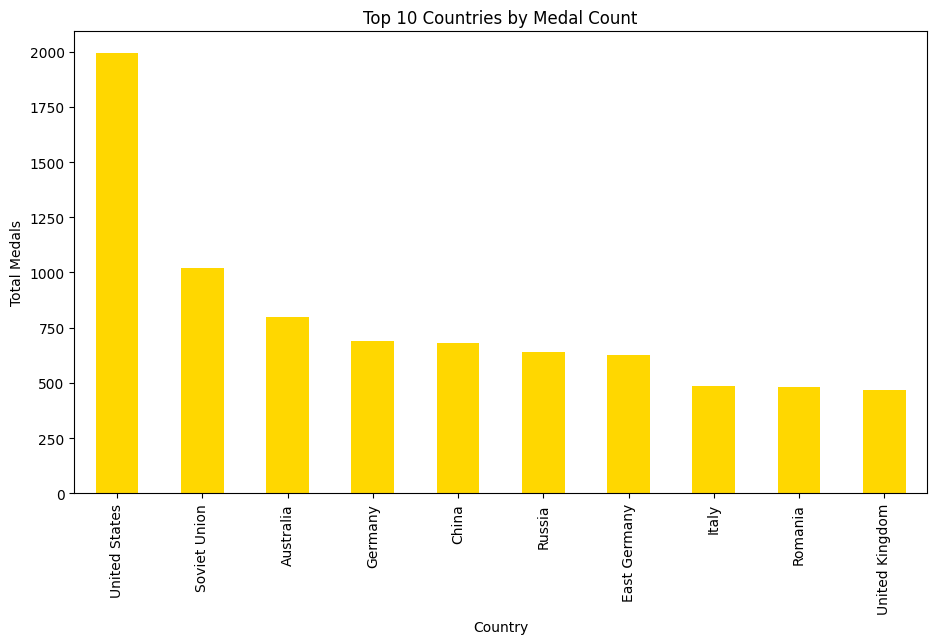

In [267]:
plt.figure(figsize = (11,6))

medals_by_country.head(10).plot(kind = 'bar', color = 'gold')
plt.title("Top 10 Countries by Medal Count")
plt.xlabel("Country")
plt.ylabel("Total Medals")

plt.show()


In [268]:
medals_over_years = data_cleaned.groupby('Year')['Medal'].count() # total medals distributed every year

In [269]:
medals_over_years

,Medal
Year,
1976.0,1305
1980.0,1387
1984.0,1459
1988.0,1546
1992.0,1705
1996.0,1859
2000.0,2015
2004.0,1998
2008.0,2042


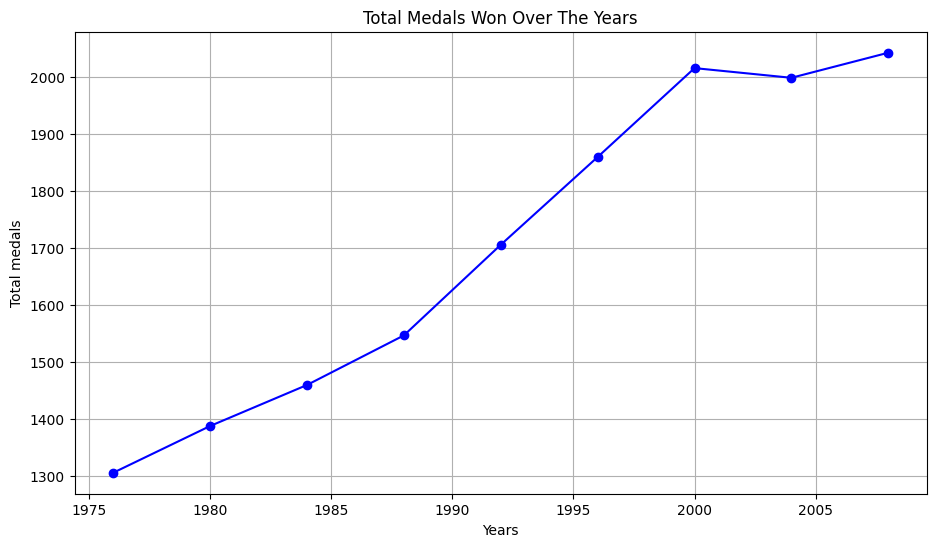

In [270]:
plt.figure(figsize = (11,6))

plt.plot(medals_over_years.index,medals_over_years.values, marker = 'o', linestyle = '-' , color = 'b')
plt.title("Total Medals Won Over The Years")
plt.xlabel("Years")
plt.ylabel("Total medals")
plt.grid(True)

plt.show()

In [271]:
gender_distribution = data_cleaned['Gender'].value_counts() # counting the participation of different genders
gender_distribution

,count
Gender,
Men,9388
Women,5928


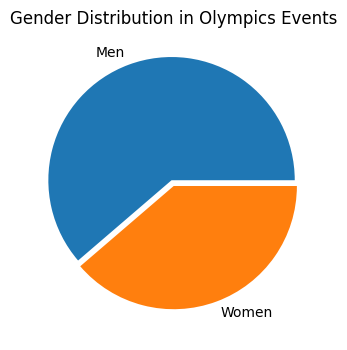

In [272]:
plt.figure(figsize = (6,4))
gender_distribution.plot(kind = 'pie' , color = ['g', 'r'], explode = [0.05,0])

plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')

plt.show()

In [273]:
athlete_medal_count = data_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending = False) #counting the medals won by each athlete over the year

In [274]:
athlete_medal_count

,Medal
Athlete,
"PHELPS, Michael",16
"FISCHER, Birgit",12
"ANDRIANOV, Nikolay",12
"TORRES, Dara",12
"THOMPSON, Jenny",12
...,...
"ZVYAGINTSEV, Viktor",1
"ZWEHL, Julia",1
"ZWERING, Klaas-Erik",1


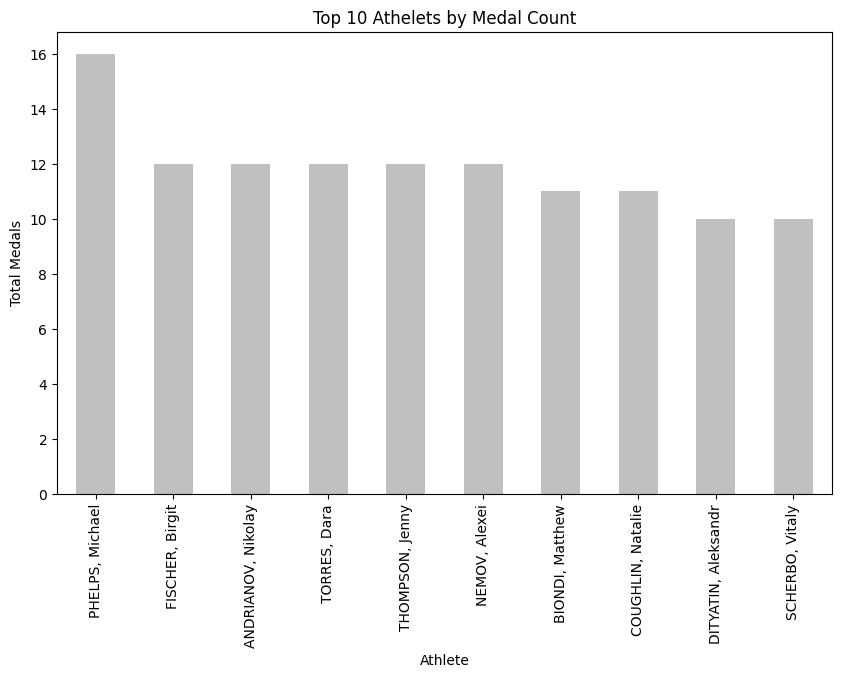

In [275]:
plt.figure(figsize = (10,6))
athlete_medal_count.head(10).plot(kind = 'bar',color = 'silver')
plt.title("Top 10 Athelets by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")

plt.show()

In [276]:
gender_ratio = data_cleaned.groupby('Year')['Gender'].value_counts(normalize=True)  # grouping on the basis of ratio of each gender the particepate each year
gender_ratio

Year    Gender
1976.0  Men       0.708046
        Women     0.291954
1980.0  Men       0.690699
        Women     0.309301
1984.0  Men       0.666895
        Women     0.333105
1988.0  Men       0.653946
        Women     0.346054
1992.0  Men       0.648094
        Women     0.351906
1996.0  Men       0.582033
        Women     0.417967
2000.0  Men       0.558809
        Women     0.441191
2004.0  Men       0.550050
        Women     0.449950
2008.0  Men       0.543585
        Women     0.456415
Name: proportion, dtype: float64

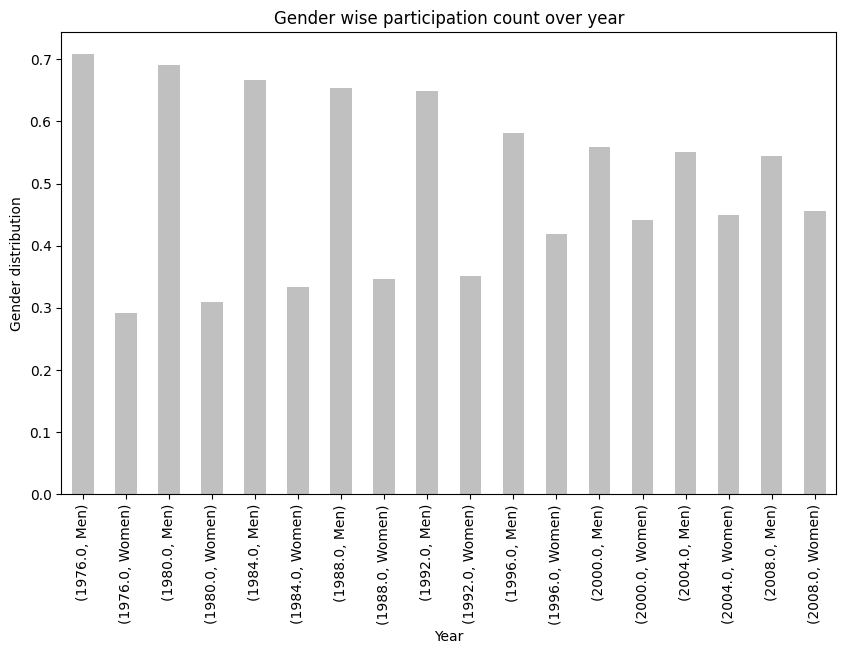

In [277]:
plt.figure(figsize = (10,6))
gender_ratio.plot(kind = 'bar',color = 'silver')
plt.title("Gender wise participation count over year")
plt.xlabel("Year")
plt.ylabel("Gender distribution")

plt.show()

In [278]:
gender_record_year =  data_cleaned.groupby('Year')['Gender'].count() # groups the gender record for each year(no. of participants each year)
gender_record_year

,Gender
Year,
1976.0,1305
1980.0,1387
1984.0,1459
1988.0,1546
1992.0,1705
1996.0,1859
2000.0,2015
2004.0,1998
2008.0,2042


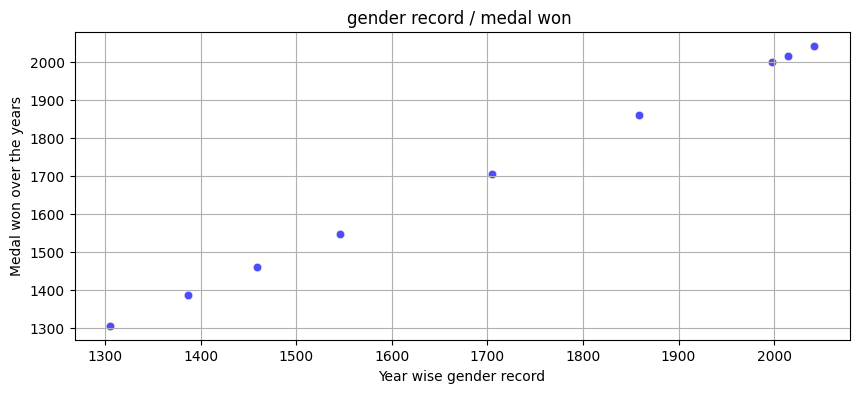

In [279]:
plt.figure(figsize = (10,4))
medals_over_years = data_cleaned.groupby('Year')['Medal'].count()
sns.scatterplot(data = data_cleaned, x = gender_record_year, y = medals_over_years, color = 'blue', edgecolor = 'linen', alpha = 0.7)
plt.title("gender record / medal won ")
plt.xlabel('Year wise gender record')
plt.ylabel('Medal won over the years')
plt.grid('True')
plt.show()

Medals won is increasing steadly with years. strong positive correlation between medals won and year record.

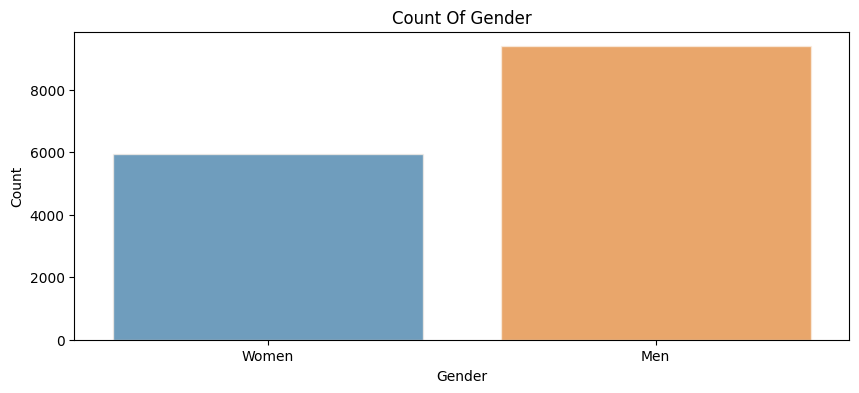

In [280]:
plt.figure(figsize = (10,4))
sns.countplot(data = data_cleaned, x = 'Gender', edgecolor = 'linen', alpha = 0.7,hue = 'Gender')
plt.title("Count Of Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

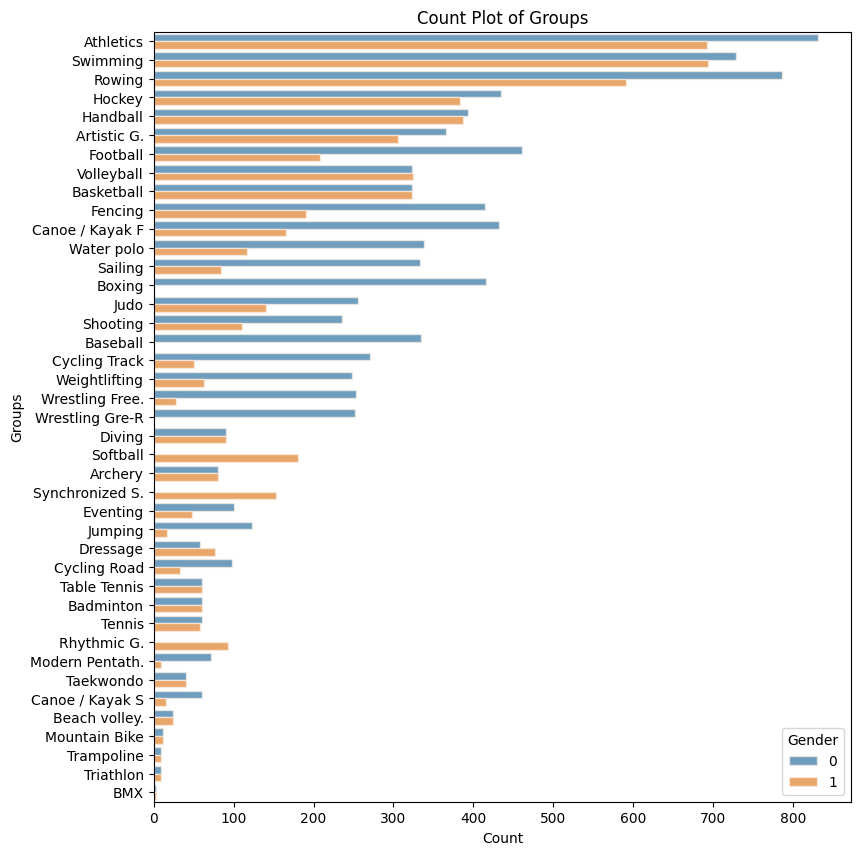

In [281]:
# Create a count plot of the "groups" feature

plt.figure(figsize = (9,10))

order = data_cleaned['Discipline'].value_counts().index
sns.countplot(data = data_sorted ,y ='Discipline', order = order, edgecolor = 'linen', alpha = 0.7,hue = 'Gender')

plt.title("Count Plot of Groups")
plt.xlabel('Count')
plt.ylabel('Groups')
plt.show()

sub grouping on the basis of medals

In [282]:
sub1 = data_cleaned[data_cleaned['Medal'] == 'Silver']

In [283]:
sub2 = data_cleaned[data_cleaned['Medal'] == 'Gold']

In [284]:
sub3 = data_cleaned[data_cleaned['Medal'] == 'Bronze']

/tmp/ipython-input-690706052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sub1, x='Gender', palette='coolwarm')


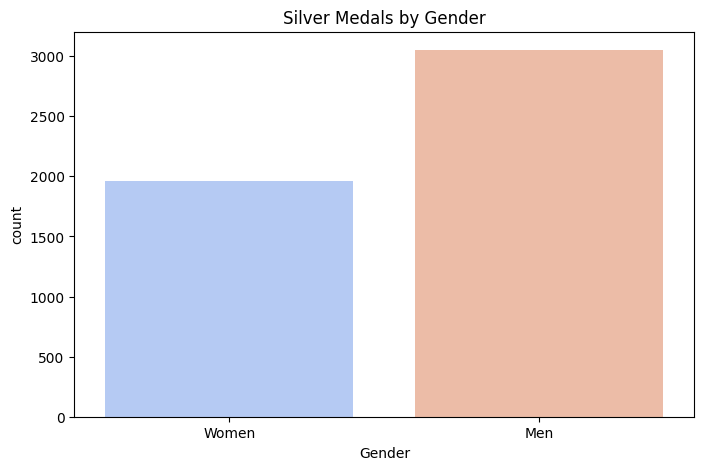

In [285]:
plt.figure(figsize=(8,5))
sns.countplot(data=sub1, x='Gender', palette='coolwarm')
plt.title("Silver Medals by Gender")
plt.show()

In [286]:
gold_counts = sub2.groupby('Year').size().reset_index(name='Count')

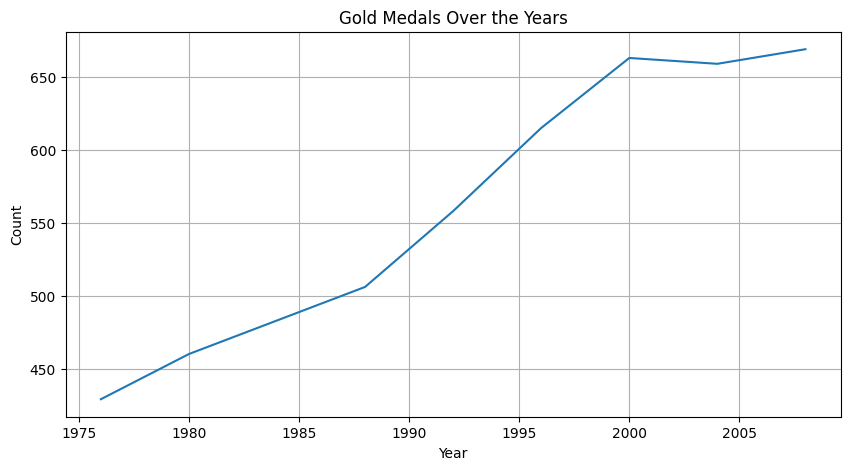

In [287]:
plt.figure(figsize=(10,5))
sns.lineplot(data=gold_counts, x='Year', y='Count', errorbar=None)
plt.title("Gold Medals Over the Years")
plt.grid('True')
plt.show()

In [288]:
India = data_cleaned[data_cleaned['Country_Code'] == 'IND']

In [289]:
India_count = India.groupby('Year').size().reset_index(name = 'Count')
India_count

,Year,Count
0,1980.0,16
1,1996.0,1
2,2000.0,1
3,2004.0,1
4,2008.0,3


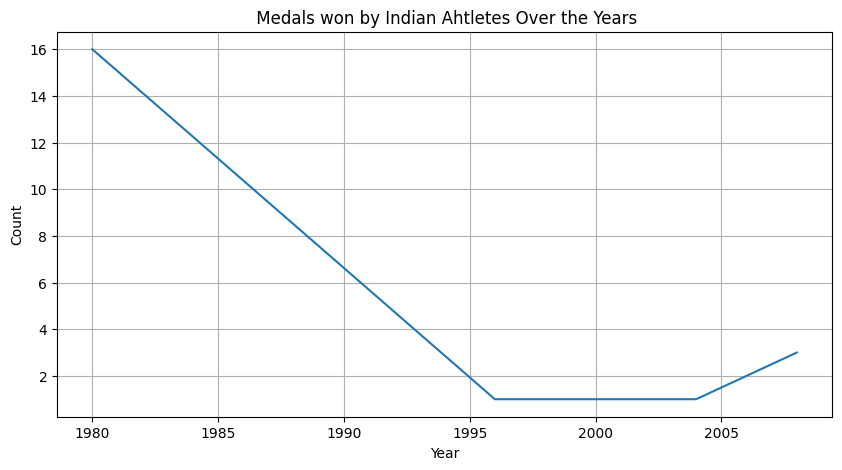

In [290]:
plt.figure(figsize=(10,5))
sns.lineplot(data = India_count , x='Year', y='Count', errorbar=None)
plt.title(" Medals won by Indian Ahtletes Over the Years")
plt.grid('True')
plt.show()

In [291]:
IND_Gender_destribution  = India.groupby('Gender').size().reset_index(name = 'Count')

In [292]:
IND_Gender_destribution

,Gender,Count
0,Men,21
1,Women,1


<Figure size 800x500 with 0 Axes>

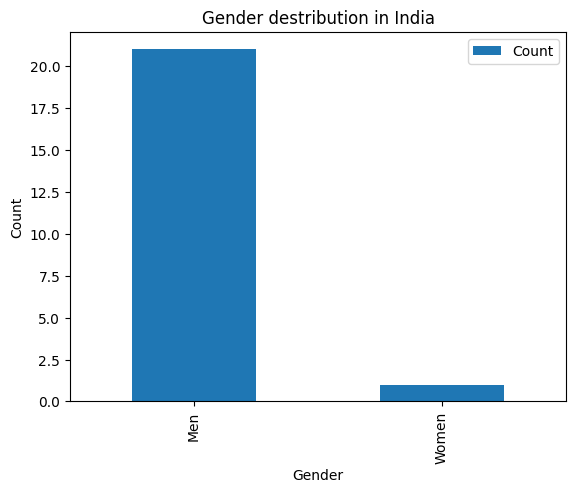

In [293]:
plt.figure(figsize=(8,5))
IND_Gender_destribution.index = IND_Gender_destribution.index.map({0:'Men',1:'Women'})
IND_Gender_destribution.plot(kind = 'bar',title = 'Gender destribution in India')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [295]:
le = LabelEncoder()
data_cleaned['Country_Code'] = le.fit_transform(data_cleaned['Country_Code'])
data_cleaned['Sport'] = le.fit_transform(data_cleaned['Sport'])
data_cleaned['Gender'] = le.fit_transform(data_cleaned['Gender'])
data_cleaned['Event_gender'] = le.fit_transform(data_cleaned['Event_gender'])
data_cleaned['Year'] = le.fit_transform(data_cleaned['Year'])

/tmp/ipython-input-3485067397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Country_Code'] = le.fit_transform(data_cleaned['Country_Code'])
/tmp/ipython-input-3485067397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Sport'] = le.fit_transform(data_cleaned['Sport'])
/tmp/ipython-input-3485067397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [296]:
X = data_cleaned[['Country_Code', 'Sport', 'Gender',
'Event_gender']]
y = data_cleaned['Year']
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y   )


# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Model evaluation

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Year
8    2042
6    2015
7    1998
5    1859
4    1705
3    1546
2    1459
1    1387
0    1305
Name: count, dtype: int64
Accuracy Score: 0.1425462459194777
Confusion Matrix:
 [[ 22  10   0 115   4   0  31  74 135]
 [ 21  17   0 129   5   0  12  79 153]
 [ 26  11   0  95  19   0  19  90 178]
 [ 43   5   0 103  12   0  32  95 174]
 [ 17  12   0  79  42   0  22  93 246]
 [ 20  14   0 101  31   0  28 120 244]
 [ 19   9   0 103  33   0  33 169 239]
 [ 26   7   0  78  46   0  41 153 248]
 [ 19   2   0  84  38   0  33 152 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.06      0.07       391
           1       0.20      0.04      0.07       416
           2       0.00      0.00      0.00       438
           3       0.12      0.22      0.15       464
           4       0.18      0.08      0.11       511
           5       0.00      0.00      0.00       558
           6       0.13      0.05      0.08       605
           7    

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre